In [ ]:
pip install pandas scikit-learn nltk matplotlib seaborn wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = {
    "text": [
        "I feel very sad and empty. I cry all the time.",
        "My anxiety is out of control, especially in social situations.",
        "Everything feels stressful these days.",
        "I feel happy and relaxed with my family.",
        "I'm not motivated to get out of bed lately.",
        "Work gives me joy and purpose.",
        "I'm having panic attacks and can't breathe well.",
        "I have trouble concentrating and always feel tired.",
        "Things are going well, no worries lately.",
        "I’m constantly worried something bad will happen."
    ],
    "label": [
        "Depression", "Anxiety", "Stress", "Healthy", "Depression",
        "Healthy", "Anxiety", "Depression", "Healthy", "Anxiety"
    ]
}

df = pd.DataFrame(data)
print(df.head())

                                                text       label
0     I feel very sad and empty. I cry all the time.  Depression
1  My anxiety is out of control, especially in so...     Anxiety
2             Everything feels stressful these days.      Stress
3           I feel happy and relaxed with my family.     Healthy
4        I'm not motivated to get out of bed lately.  Depression


In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return " ".join(text)

df['clean_text'] = df['text'].apply(preprocess)

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     Anxiety       0.00      0.00      0.00       1.0
  Depression       0.00      0.00      0.00       0.0
     Healthy       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
 [[0 1 0]
 [0 0 0]
 [0 1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
def predict_mental_health(entry):
    entry_clean = preprocess(entry)
    vector = vectorizer.transform([entry_clean]).toarray()
    prediction = model.predict(vector)[0]
    return prediction
user_entry = "I feel like I’m losing control and constantly nervous."
result = predict_mental_health(user_entry)
print(f"Predicted Mental State: {result}")

Predicted Mental State: Depression


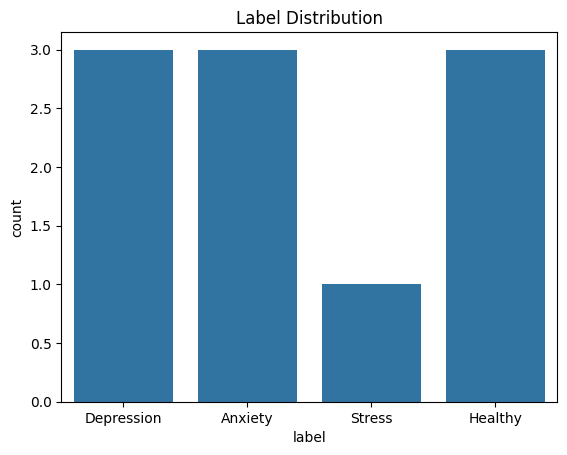

In [ ]:
sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.show()